In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install roboflow
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=eaf349bb775f3984f42847333804626e2036e1615fdf7527fe5e8929abe34a6b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pypar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 32.4 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow as rf
from roboflow import Roboflow

## FIRST VERSION
# VERSION = 1

# project = rf.workspace("graduation-project-wbypm").project("accident-2.0")
# version = 8
# dataset = project.version(VERSION).download("yolov8")


## AUGMENTATION BIG DATASET
# VERSION = 2
# rf = Roboflow(api_key="6iK6QLc2LtyvZgimKwtO")
# project = rf.workspace("graduation-project-wbypm").project("accident-2.0")
# dataset = project.version(2).download("yolov8")

# # yolo x
# VERSION = 4
# rf = Roboflow(api_key="6iK6QLc2LtyvZgimKwtO")
# project = rf.workspace("graduation-project-wbypm").project("accident-2.0")
# dataset = project.version(4).download("yolov8")

# yolo l
VERSION = 5
rf = Roboflow(api_key="6iK6QLc2LtyvZgimKwtO")
project = rf.workspace("graduation-project-wbypm").project("accident-2.0")
dataset = project.version(5).download("yolov8")


## Dataset 3.0
# VERSION = 1
# rf = Roboflow(api_key="6iK6QLc2LtyvZgimKwtO")
# project = rf.workspace("graduation-project-wbypm").project("accident3.0")
# dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.123, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to accident-2.0-5 in yolov8:: 100%|██████████| 1312/1312 [00:01<00:00, 1019.63it/s]


In [4]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
# model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8l.pt')
# model = YOLO('/content/drive/MyDrive/GP/dataset_2.0/2.0-x1.pt')

# Train the model using the 'coco128.yaml' dataset for 3 epochs
results = model.train(data=f'/content/accident-2.0-{VERSION}/data.yaml', epochs=300, patience=30, imgsz=320, batch=-1)

# Evaluate the model's performance on the validation set
results = model.val()

# Perform object detection on an image using the model
# results = model('https://ultralytics.com/images/bus.jpg')

# Export the model to ONNX format
# success = model.export(format='onnx')


100%|██████████| 83.7M/83.7M [00:06<00:00, 14.1MB/s]
Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/accident-2.0-5/data.yaml, epochs=300, patience=30, batch=-1, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import cv2
from google.colab.patches import cv2_imshow

shutil.copy('/content/runs/detect/train/weights/best.pt', '/content/drive/MyDrive/GP/dataset_2.0')

# shutil.copy('/content/runs/detect/val/best.pt', '/content/drive/MyDrive/GP/dataset_2.0')

'/content/drive/MyDrive/GP/dataset_2.0/best.pt'


0: 256x320 (no detections), 133.5ms
Speed: 15.8ms preprocess, 133.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)


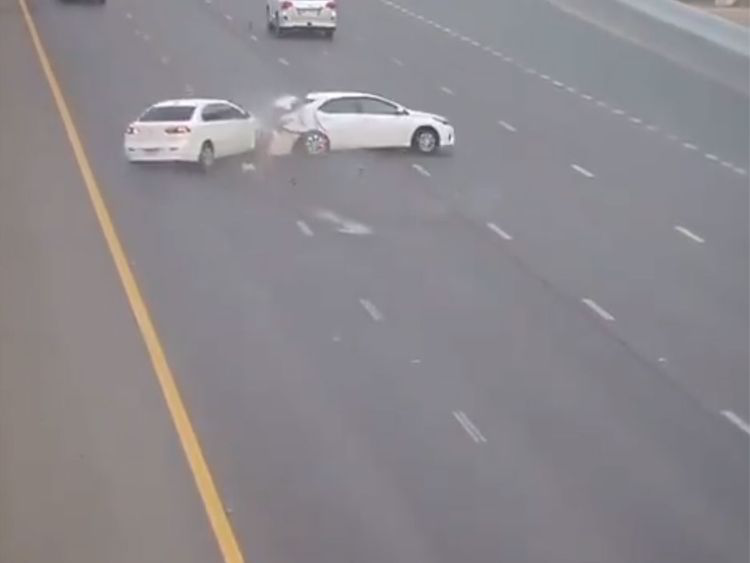

In [6]:
# model = YOLO('/content/drive/MyDrive/GP/amt_yolo/YOLOv8_v4.pt')

img = Image.open("/content/drive/MyDrive/GP/dataset_2.0/Car_Crash2.jpg")
# res = model.predict(source=img, save=False)
res = model(img)
res_img = res[0].plot()
cv2_imshow(res_img)